<a href="https://colab.research.google.com/github/pbevan1/CycleGAN-Human-Anime-Translation/blob/main/Peter_Bevan_CycleGAN_Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Two sets of images are downloaded from Stephen McGough. 'PubFig' is a set of images of celebrity faces**

In [3]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import zipfile
import os
import numpy as np
import shutil
from matplotlib import pyplot as plt

In [ ]:
#download anime and public figures images from Stephen McGough using curl
!curl -O http://homepages.cs.ncl.ac.uk/stephen.mcgough/Teaching/anime.zip
print('anime dataset downloaded to working directory')
!curl -O http://homepages.cs.ncl.ac.uk/stephen.mcgough/Teaching/PubFig.zip
print('public figure faces dataset downloaded to working directory')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  394M  100  394M    0     0   638k      0  0:10:32  0:10:32 --:--:--  629k
anime dataset downloaded to working directory
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  175M  100  175M    0     0   637k      0  0:04:42  0:04:42 --:--:--  626k
public figure faces dataset downloaded to working directory


**Unzipping the downloaded files into working directory**

In [ ]:
#extracting zipped image files into directory
## Unzipping PubFig.zip
with zipfile.ZipFile('/content/PubFig.zip', 'r') as zip_ref:
    zip_ref.extractall()
print('Public figure faces dataset extracted to working directory as "CelebDataProcessed"\n')

## Unzipping anime.zip
with zipfile.ZipFile('anime.zip', 'r') as zip_ref:
    zip_ref.extractall()
print('Anime faces dataset extracted to working directory as "Images\n"')

Public figure faces dataset extracted to working directory as "CelebDataProcessed"

Anime faces dataset extracted to working directory as "Images
"


In [ ]:
#renaming files in celeb data to be unique
for root, dirs, files in os.walk('/content/CelebDataProcessed/'):
    for name in files:
        newname = str(np.random.choice(range(1,17000))) + name
        os.rename(os.path.join(root,name), os.path.join(root,newname))

## moving all images out of labelled subdirectory and into the main folder
folder = r"CelebDataProcessed/" #defining folder to search
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()] #defining subfolders
#looping through folders to move images
for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = os.path.join(folder, f)
        shutil.move(src, dst)

#deleting empty folders
path_abs=('CelebDataProcessed/') #defining path for empty folders
walk = list(os.walk(path_abs))
for path, _, _ in walk[::-1]:
    if len(os.listdir(path)) == 0:
        os.rmdir(path)

In [ ]:
len(os.listdir('CelebDataProcessed/'))

11596

In [ ]:
#defineing image size
image_size = (64,64)

def numpy_arrayify(filepath, proposed_name):
  pic_list = list()
  for filename in os.listdir(filepath):
    pic = load_img(filepath + filename, target_size=image_size)
    pic = img_to_array(pic)
    pic = pic.astype('float32')
    pic_list.append(pic)
  pic_list = np.asarray(pic_list)
  print('------------------------------------------------------')
  print(f'shape of array: {pic_list.shape}')
  print('------------------------------------------------------')
  np.savez_compressed(proposed_name, pic_list)
  print(f'{proposed_name} saved to environment')

In [ ]:
numpy_arrayify('/content/images/', 'anime.npz')
numpy_arrayify('/content/CelebDataProcessed/', 'celeb.npz')


------------------------------------------------------
shape of array: (63565, 64, 64, 3)
------------------------------------------------------
anime.npz saved to environment
------------------------------------------------------
shape of array: (11596, 64, 64, 3)
------------------------------------------------------
celeb.npz saved to environment


In [ ]:
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build
auth.authenticate_user()

In [ ]:
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
   file_metadata = {
     'name': name,
     'mimeType': 'application/octet-stream'
    }

   media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)

   created = drive_service.files().create(body=file_metadata,
                                  media_body=media,
                                  fields='id').execute()

   print('File ID: {}'.format(created.get('id')))

   return created

In [ ]:
save_file_to_drive('anime.npz', '/content/anime.npz')
save_file_to_drive('celeb.npz', '/content/celeb.npz')

File ID: 1XNVPmCPaRGOP3TOmZJRNaB2galmHKcYz


{'id': '1XNVPmCPaRGOP3TOmZJRNaB2galmHKcYz'}

**### If you do not wish to wait for the above code to process the data, please download the preprocessed zipped numpy arrays containing the celebrity faces and anime faces (run code block below to download from my google drive into the environment) ###**

In [1]:
#!pip install gdown # Execute this if you don't have gdown
!gdown --id 1XNVPmCPaRGOP3TOmZJRNaB2galmHKcYz
!gdown --id 1s2JMK51qX8W2ARjKLN_IwVO6AvsCHL6P

Downloading...
From: https://drive.google.com/uc?id=1XNVPmCPaRGOP3TOmZJRNaB2galmHKcYz
To: /content/anime.npz
995MB [00:12, 79.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1s2JMK51qX8W2ARjKLN_IwVO6AvsCHL6P
To: /content/celeb.npz
181MB [00:02, 60.6MB/s]


In [4]:
#loading zipped files
celeb = np.load('celeb.npz')
anime = np.load('anime.npz')
#assigning numpy arrays
celeb = celeb['arr_0']
anime = anime['arr_0']

print('---------------------------------------')
print(f'Celeb data is shape: {celeb.shape}')
print('---------------------------------------')
print(f'Anime data is shape: {anime.shape}')
print('---------------------------------------')

---------------------------------------
Celeb data is shape: (11596, 64, 64, 3)
---------------------------------------
Anime data is shape: (63565, 64, 64, 3)
---------------------------------------


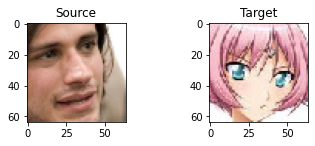

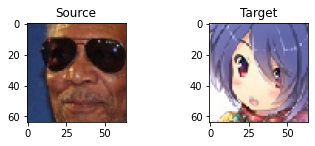

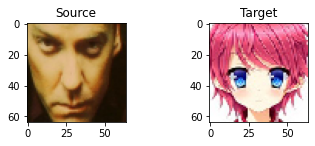

In [5]:
### plotting sample of three of the source (celeb pics) and target (anime pics)
### side by side
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Source')
ax1.imshow(celeb[0].astype('uint8'))
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Target')
ax2.imshow(anime[0].astype('uint8'))
fig = plt.figure()
ax3 = fig.add_subplot(2,2,1)
ax3.set_title('Source')
ax3.imshow(celeb[1].astype('uint8'))
ax4 = fig.add_subplot(2,2,2)
ax4.set_title('Target')
ax4.imshow(anime[1].astype('uint8'))
fig = plt.figure()
ax3 = fig.add_subplot(2,2,1)
ax3.set_title('Source')
ax3.imshow(celeb[2].astype('uint8'))
ax4 = fig.add_subplot(2,2,2)
ax4.set_title('Target')
ax4.imshow(anime[2].astype('uint8'));

In [6]:
#scaling image pixel values from range [0,255] to [-1,1]
celeb = (celeb - 127.5) / 127.5
anime = (anime - 127.5) / 127.5

**Implementation below was taken from Keras website:**

https://keras.io/examples/generative/cyclegan/

Setup

In [8]:
!pip install tensorflow_addons
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_addons as tfa
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
autotune = tf.data.experimental.AUTOTUNE

     |████████████████████████████████| 706kB 5.6MB/s 


In [9]:
# Define the standard image size.
orig_img_size = (64, 64)
# Size of the random crops to be used during training.
input_img_size = (60, 60, 3)
# Weights initializer for the layers.
kernel_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# Gamma initializer for instance normalization.
gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

buffer_size = 64 ####
batch_size = 1

Building blocks used in the CycleGAN generators and discriminators

In [10]:
class ReflectionPadding2D(layers.Layer):
    """Implements Reflection Padding as a layer.

    Args:
        padding(tuple): Amount of padding for the
        spatial dimensions.

    Returns:
        A padded tensor with the same type as the input tensor.
    """

    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        super(ReflectionPadding2D, self).__init__(**kwargs)

    def call(self, input_tensor, mask=None):
        padding_width, padding_height = self.padding
        padding_tensor = [
            [0, 0],
            [padding_height, padding_height],
            [padding_width, padding_width],
            [0, 0],
        ]
        return tf.pad(input_tensor, padding_tensor, mode="REFLECT")


def residual_block(
    x,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="valid",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    dim = x.shape[-1]
    input_tensor = x

    x = ReflectionPadding2D()(input_tensor)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = activation(x)

    x = ReflectionPadding2D()(x)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.add([input_tensor, x])
    return x


def downsample(
    x,
    filters,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2D(
        filters,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x


def upsample(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    kernel_initializer=kernel_init,
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2DTranspose(
        filters,
        kernel_size,
        strides=strides,
        padding=padding,
        kernel_initializer=kernel_initializer,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x

**Build the generators**

The generator consists of downsampling blocks: nine residual blocks and upsampling blocks. The structure of the generator is the following:

c7s1-64 ==> Conv block with `relu` activation, filter size of 7
d128 ====|
         |-> 2 downsampling blocks
d256 ====|
R256 ====|
R256     |
R256     |
R256     |
R256     |-> 9 residual blocks
R256     |
R256     |
R256     |
R256 ====|
u128 ====|
         |-> 2 upsampling blocks
u64  ====|
c7s1-3 => Last conv block with `tanh` activation, filter size of 7

In [11]:
def get_resnet_generator(
    filters=64,
    num_downsampling_blocks=2,
    num_residual_blocks=9,
    num_upsample_blocks=2,
    gamma_initializer=gamma_init,
    name=None,
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = ReflectionPadding2D(padding=(3, 3))(img_input)
    x = layers.Conv2D(filters, (7, 7), kernel_initializer=kernel_init, use_bias=False)(
        x
    )
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.Activation("relu")(x)

    # Downsampling
    for _ in range(num_downsampling_blocks):
        filters *= 2
        x = downsample(x, filters=filters, activation=layers.Activation("relu"))

    # Residual blocks
    for _ in range(num_residual_blocks):
        x = residual_block(x, activation=layers.Activation("relu"))

    # Upsampling
    for _ in range(num_upsample_blocks):
        filters //= 2
        x = upsample(x, filters, activation=layers.Activation("relu"))

    # Final block
    x = ReflectionPadding2D(padding=(3, 3))(x)
    x = layers.Conv2D(3, (7, 7), padding="valid")(x)
    x = layers.Activation("tanh")(x)

    model = keras.models.Model(img_input, x, name=name)
    return model

**Build the discriminators**

The discriminators implement the following architecture: C64->C128->C256->C512

In [12]:
def get_discriminator(
    filters=64, kernel_initializer=kernel_init, num_downsampling=3, name=None
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = layers.Conv2D(
        filters,
        (4, 4),
        strides=(2, 2),
        padding="same",
        kernel_initializer=kernel_initializer,
    )(img_input)
    x = layers.LeakyReLU(0.2)(x)

    num_filters = filters
    for num_downsample_block in range(3):
        num_filters *= 2
        if num_downsample_block < 2:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(2, 2),
            )
        else:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(1, 1),
            )

    x = layers.Conv2D(
        1, (4, 4), strides=(1, 1), padding="same", kernel_initializer=kernel_initializer
    )(x)

    model = keras.models.Model(inputs=img_input, outputs=x, name=name)
    return model


# Get the generators
gen_G = get_resnet_generator(name="generator_G")
gen_F = get_resnet_generator(name="generator_F")

# Get the discriminators
disc_X = get_discriminator(name="discriminator_X")
disc_Y = get_discriminator(name="discriminator_Y")

**Build the CycleGAN model**

We will override the train_step() method of the Model class for training via fit().

In [13]:
class CycleGan(keras.Model):
    def __init__(
        self,
        generator_G,
        generator_F,
        discriminator_X,
        discriminator_Y,
        lambda_cycle=10.0,
        lambda_identity=0.5,
    ):
        super(CycleGan, self).__init__()
        self.gen_G = generator_G
        self.gen_F = generator_F
        self.disc_X = discriminator_X
        self.disc_Y = discriminator_Y
        self.lambda_cycle = lambda_cycle
        self.lambda_identity = lambda_identity

    def compile(
        self,
        gen_G_optimizer,
        gen_F_optimizer,
        disc_X_optimizer,
        disc_Y_optimizer,
        gen_loss_fn,
        disc_loss_fn,
    ):
        super(CycleGan, self).compile()
        self.gen_G_optimizer = gen_G_optimizer
        self.gen_F_optimizer = gen_F_optimizer
        self.disc_X_optimizer = disc_X_optimizer
        self.disc_Y_optimizer = disc_Y_optimizer
        self.generator_loss_fn = gen_loss_fn
        self.discriminator_loss_fn = disc_loss_fn
        self.cycle_loss_fn = keras.losses.MeanAbsoluteError()
        self.identity_loss_fn = keras.losses.MeanAbsoluteError()

    def train_step(self, batch_data):
        # x is Horse and y is zebra
        real_x, real_y = batch_data

        # For CycleGAN, we need to calculate different
        # kinds of losses for the generators and discriminators.
        # We will perform the following steps here:
        #
        # 1. Pass real images through the generators and get the generated images
        # 2. Pass the generated images back to the generators to check if we
        #    we can predict the original image from the generated image.
        # 3. Do an identity mapping of the real images using the generators.
        # 4. Pass the generated images in 1) to the corresponding discriminators.
        # 5. Calculate the generators total loss (adverserial + cycle + identity)
        # 6. Calculate the discriminators loss
        # 7. Update the weights of the generators
        # 8. Update the weights of the discriminators
        # 9. Return the losses in a dictionary

        with tf.GradientTape(persistent=True) as tape:
            # Horse to fake zebra
            fake_y = self.gen_G(real_x, training=True)
            # Zebra to fake horse -> y2x
            fake_x = self.gen_F(real_y, training=True)

            # Cycle (Horse to fake zebra to fake horse): x -> y -> x
            cycled_x = self.gen_F(fake_y, training=True)
            # Cycle (Zebra to fake horse to fake zebra) y -> x -> y
            cycled_y = self.gen_G(fake_x, training=True)

            # Identity mapping
            same_x = self.gen_F(real_x, training=True)
            same_y = self.gen_G(real_y, training=True)

            # Discriminator output
            disc_real_x = self.disc_X(real_x, training=True)
            disc_fake_x = self.disc_X(fake_x, training=True)

            disc_real_y = self.disc_Y(real_y, training=True)
            disc_fake_y = self.disc_Y(fake_y, training=True)

            # Generator adverserial loss
            gen_G_loss = self.generator_loss_fn(disc_fake_y)
            gen_F_loss = self.generator_loss_fn(disc_fake_x)

            # Generator cycle loss
            cycle_loss_G = self.cycle_loss_fn(real_y, cycled_y) * self.lambda_cycle
            cycle_loss_F = self.cycle_loss_fn(real_x, cycled_x) * self.lambda_cycle

            # Generator identity loss
            id_loss_G = (
                self.identity_loss_fn(real_y, same_y)
                * self.lambda_cycle
                * self.lambda_identity
            )
            id_loss_F = (
                self.identity_loss_fn(real_x, same_x)
                * self.lambda_cycle
                * self.lambda_identity
            )

            # Total generator loss
            total_loss_G = gen_G_loss + cycle_loss_G + id_loss_G
            total_loss_F = gen_F_loss + cycle_loss_F + id_loss_F

            # Discriminator loss
            disc_X_loss = self.discriminator_loss_fn(disc_real_x, disc_fake_x)
            disc_Y_loss = self.discriminator_loss_fn(disc_real_y, disc_fake_y)

        # Get the gradients for the generators
        grads_G = tape.gradient(total_loss_G, self.gen_G.trainable_variables)
        grads_F = tape.gradient(total_loss_F, self.gen_F.trainable_variables)

        # Get the gradients for the discriminators
        disc_X_grads = tape.gradient(disc_X_loss, self.disc_X.trainable_variables)
        disc_Y_grads = tape.gradient(disc_Y_loss, self.disc_Y.trainable_variables)

        # Update the weights of the generators
        self.gen_G_optimizer.apply_gradients(
            zip(grads_G, self.gen_G.trainable_variables)
        )
        self.gen_F_optimizer.apply_gradients(
            zip(grads_F, self.gen_F.trainable_variables)
        )

        # Update the weights of the discriminators
        self.disc_X_optimizer.apply_gradients(
            zip(disc_X_grads, self.disc_X.trainable_variables)
        )
        self.disc_Y_optimizer.apply_gradients(
            zip(disc_Y_grads, self.disc_Y.trainable_variables)
        )

        return {
            "G_loss": total_loss_G,
            "F_loss": total_loss_F,
            "D_X_loss": disc_X_loss,
            "D_Y_loss": disc_Y_loss,
        }

**Create a callback that periodically saves generated images**

In [14]:
class GANMonitor(keras.callbacks.Callback):
    """A callback to generate and save images after each epoch"""

    def __init__(self, num_img=4):
        self.num_img = num_img

    def on_epoch_end(self, epoch, logs=None):
        _, ax = plt.subplots(4, 2, figsize=(12, 12))
        for i, img in enumerate(test_horses.take(self.num_img)):
            prediction = self.model.gen_G(img)[0].numpy()
            prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
            img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

            ax[i, 0].imshow(img)
            ax[i, 1].imshow(prediction)
            ax[i, 0].set_title("Input image")
            ax[i, 1].set_title("Translated image")
            ax[i, 0].axis("off")
            ax[i, 1].axis("off")

            prediction = keras.preprocessing.image.array_to_img(prediction)
            prediction.save(
                "generated_img_{i}_{epoch}.png".format(i=i, epoch=epoch + 1)
            )
        plt.show()
        plt.close()

**Train the end-to-end model**

In [17]:
# Loss function for evaluating adversarial loss
adv_loss_fn = keras.losses.MeanSquaredError()

# Define the loss function for the generators
def generator_loss_fn(fake):
    fake_loss = adv_loss_fn(tf.ones_like(fake), fake)
    return fake_loss


# Define the loss function for the discriminators
def discriminator_loss_fn(real, fake):
    real_loss = adv_loss_fn(tf.ones_like(real), real)
    fake_loss = adv_loss_fn(tf.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5


# Create cycle gan model
cycle_gan_model = CycleGan(
    generator_G=gen_G, generator_F=gen_F, discriminator_X=disc_X, discriminator_Y=disc_Y
)

# Compile the model
cycle_gan_model.compile(
    gen_G_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_F_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_X_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_Y_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_loss_fn=generator_loss_fn,
    disc_loss_fn=discriminator_loss_fn,
)
# Callbacks
plotter = GANMonitor()
checkpoint_filepath = "./model_checkpoints/cyclegan_checkpoints.{epoch:03d}"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath
)

# Here we will train the model for just one epoch as each epoch takes around
# 7 minutes on a single P100 backed machine.
Da
cycle_gan_model.fit(
    tf.data.Dataset.zip((celeb, anime)),
    epochs=1,
    callbacks=[plotter, model_checkpoint_callback],
)

TypeError: ignored

In [ ]:
	# load and resize the image
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# transform in a sample
	pixels = expand_dims(pixels, 0)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	return pixels